In [19]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

In [4]:
dataset

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [5]:
preview = dataset.head()

In [6]:
statistics = dataset.describe(include='all')

In [7]:
preview, statistics

(   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2      Internet  RoundTrip            262              19   
 1               1      Internet  RoundTrip            112              20   
 2               2      Internet  RoundTrip            243              22   
 3               1      Internet  RoundTrip             96              31   
 4               2      Internet  RoundTrip             68              22   
 
    flight_hour flight_day   route booking_origin  wants_extra_baggage  \
 0            7        Sat  AKLDEL    New Zealand                    1   
 1            3        Sat  AKLDEL    New Zealand                    0   
 2           17        Wed  AKLDEL          India                    1   
 3            4        Sat  AKLDEL    New Zealand                    0   
 4           15        Wed  AKLDEL          India                    1   
 
    wants_preferred_seat  wants_in_flight_meals  flight_duration  \
 0              

In [8]:
missing_values = dataset.isnull().sum()

In [9]:
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)


In [10]:
dataset.head(5)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset['total_travel_time'] = dataset['flight_duration'] + dataset['length_of_stay']

In [12]:
prepared_dataset = dataset.drop(columns=['booking_complete'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
X = prepared_dataset
y = dataset['booking_complete']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]


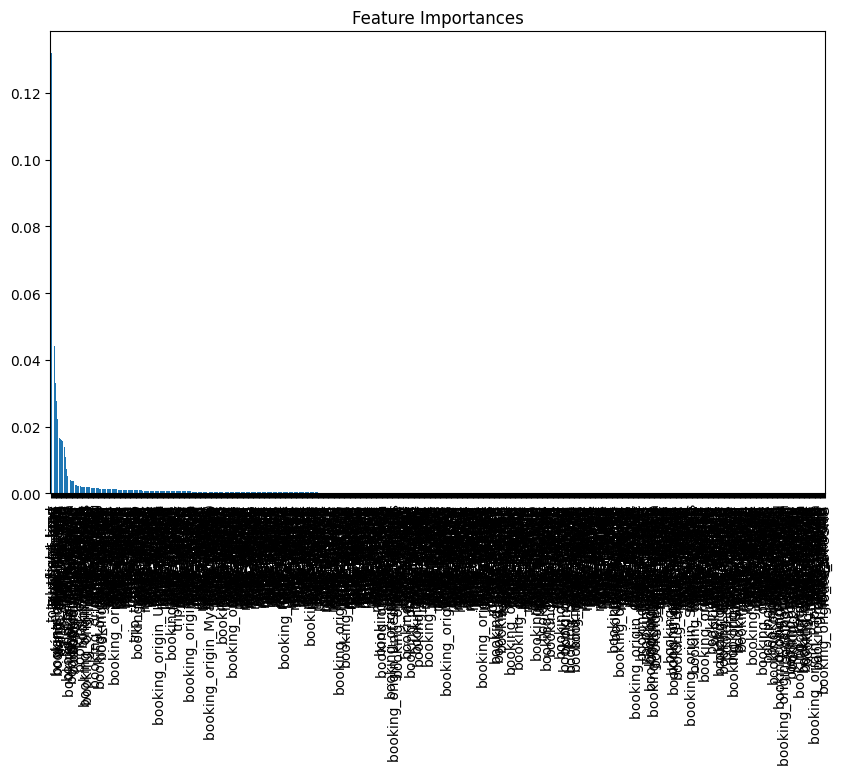

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [22]:
cm = confusion_matrix(y_test, y_pred)

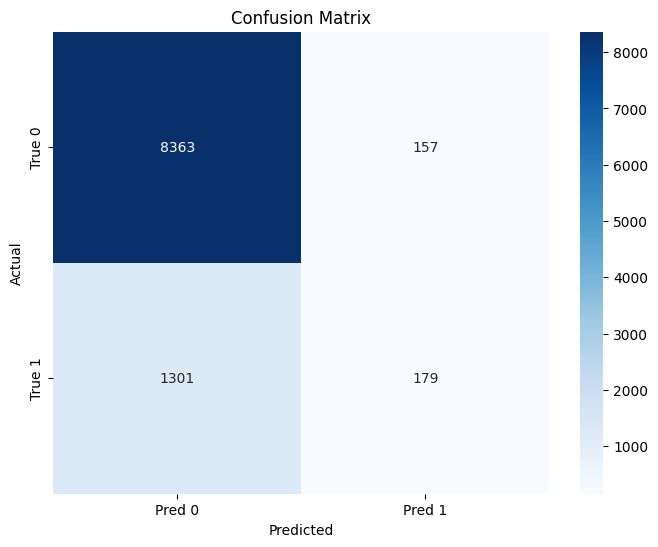

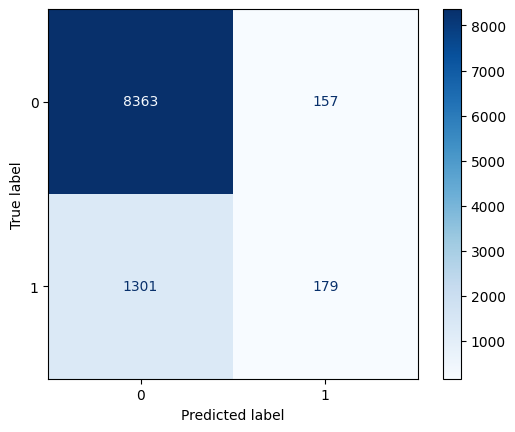

In [24]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Alternatively, using sklearn's display function
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap="Blues")
plt.show()